<a href="https://colab.research.google.com/github/tousyou/keras/blob/master/california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import pandas as pd


california = pd.read_csv('./sample_data/california_housing_test.csv')
california.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [8]:
california.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [20]:
y_train = california['median_house_value'].values
california.pop('median_house_value')

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

In [24]:
x_train = california.values

In [25]:
print("x_train.shape =", x_train.shape )
print("y_train.shape =", y_train.shape )

x_train.shape = (3000, 8)
y_train.shape = (3000,)


In [53]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(8,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Use binary cross entropy loss function for binary classification
model.compile(
#            optimizer='Nadam',
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
            loss='mean_absolute_error',
            metrics=['MAE'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 300,
                    validation_split=0.2 #Split part of the training data for validation
                   )


Epoch 1/300
38/38 [==============================] - 0s 3ms/step - loss: 117245.4922 - MAE: 117245.4922 - val_loss: 116829.1719 - val_MAE: 116829.1719
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 115253.5078 - MAE: 115253.5078 - val_loss: 120741.7734 - val_MAE: 120741.7734
Epoch 3/300
38/38 [==============================] - 0s 1ms/step - loss: 113676.3359 - MAE: 113676.3359 - val_loss: 115428.8672 - val_MAE: 115428.8672
Epoch 4/300
38/38 [==============================] - 0s 1ms/step - loss: 113035.5859 - MAE: 113035.5859 - val_loss: 114531.5312 - val_MAE: 114531.5312
Epoch 5/300
38/38 [==============================] - 0s 1ms/step - loss: 112073.5625 - MAE: 112073.5625 - val_loss: 113848.7969 - val_MAE: 113848.7969
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 111682.0234 - MAE: 111682.0234 - val_loss: 113900.1484 - val_MAE: 113900.1484
Epoch 7/300
38/38 [==============================] - 0s 1ms/step - loss: 110474.0547 - MAE: 11

In [45]:

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

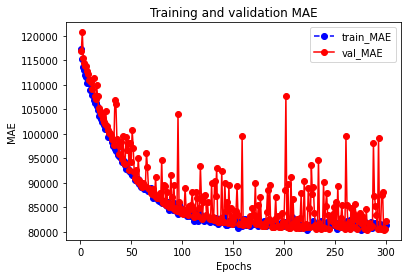

In [55]:
plot_metric(history,"MAE")

In [50]:
model.evaluate(x_train,y_train)

94/94 [==============================] - 0s 796us/step - loss: 83724.6953 - MAE: 83724.6953


[83724.6953125, 83724.6953125]

In [56]:
model.predict(x_train[0:10])

array([[204400.92 ],
       [170623.53 ],
       [202829.36 ],
       [164248.92 ],
       [156339.19 ],
       [167494.22 ],
       [177186.06 ],
       [160425.17 ],
       [187237.42 ],
       [ 80059.266]], dtype=float32)

In [58]:
y_train[0:10]

array([344700., 176500., 270500., 330000.,  81700.,  67000.,  67000.,
       166900., 194400., 164200.])